# Title

### Section 1: Different fonts

Regular. **Bold**. *Italic*.

### Section 2: Enumeration 
- First bullet
- Second bullet
>1. A
>2. B
- Third bullet
>- Sub-bullet
>- Sub-bullet

### Section 3: Code


This is inline code: `[x*x for x in X]` , and this is a block of code (note the syntax highlighting!):

```python
# comment
def foo(x,y,z): 
    return x + 10 * y + 100 * z
```

# Question 2

## Data Validation

In [1]:
# set up the environment
import pandas as pd

def print_file(filename):
    with open(filename) as f:
        print(f.read(),end='')

In [2]:
filename = 'student-mat.csv'
print_file(filename)

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6
"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10
"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10
"GP";"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"mot

In [3]:
data = pd.read_csv(filename, sep=';')
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [4]:
# count missing entries in G3 column
column = 'G3'
missing = pd.isnull(data[column]).sum()
print(f'{missing} missing entries in {column}')

# Let's find out how many rows in dataset have nulls
pd3 = pd.isnull(data)

count = 0
for i in range(data.shape[0]):
    rowisnull = False
    for j in range(data.shape[1]):
        rowisnull = rowisnull or pd.isnull(data.iloc[i][j])
    
    if rowisnull == True:
        count +=1
print(count, "rows in dataset have nulls")

0 missing entries in G3
0 rows in dataset have nulls


In [6]:
# check if types are as expecteed
data.dtypes 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Since there is no missing entry, data cleansing is not needed. However, we do need an additional data preparation to do with the data types. 

## Additional Data Preparation

 Since we will use the features `sex` and `schoolsup` in the later training and predicting and the `scikit-learn` algorithm only works for numerical attributes, we have to replace the `"Male"/"Female"` and `"yes"/"no"` with `1/0`.  

In [7]:
data['sex'] = data['sex'].apply(lambda x : 0 if x == "F" else 1)
data['schoolsup'] = data['schoolsup'].apply(lambda x : 1 if x == "yes" else 0)
data.dtypes

school        object
sex            int64
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Create and Train the Algorithm

Since we want all the predicted values to be real numbers, we choose the regression tree instead of the classification tree here. 

In [8]:
# set up the environment
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

<IPython.core.display.Javascript object>


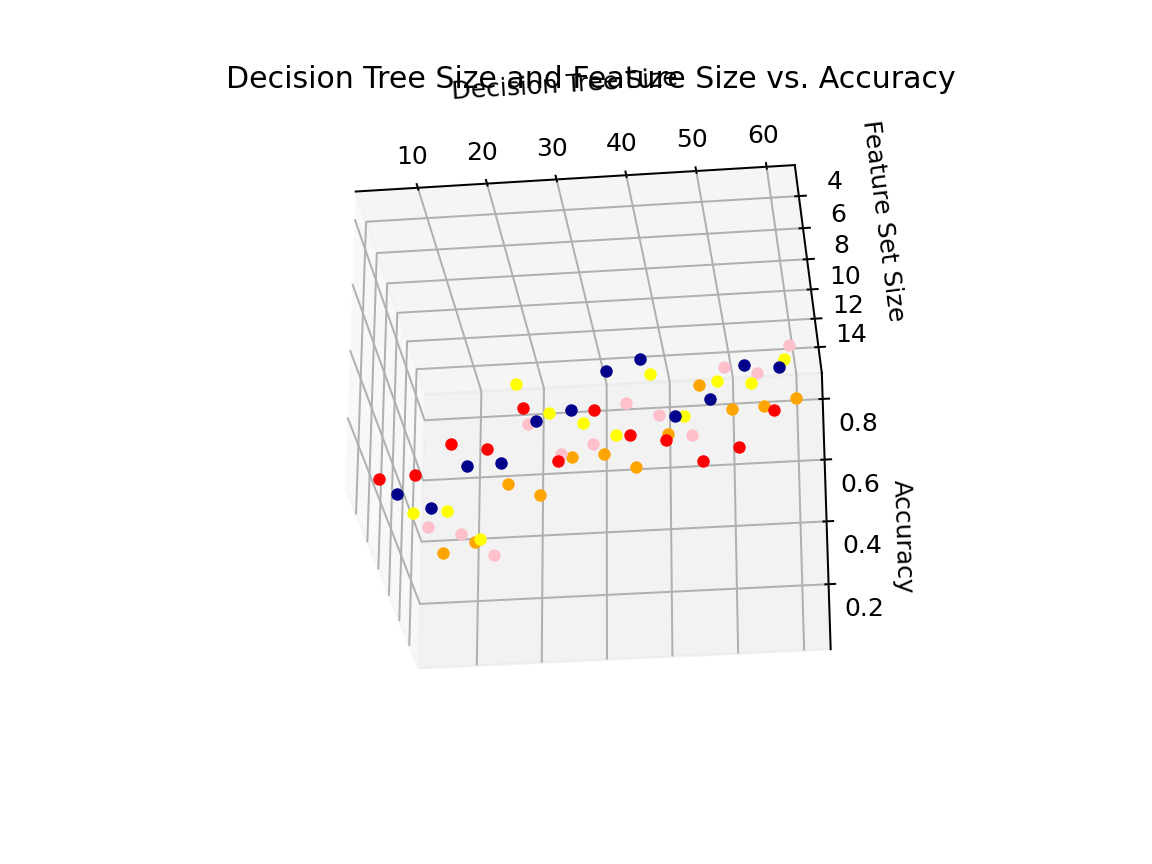

<IPython.core.display.Javascript object>


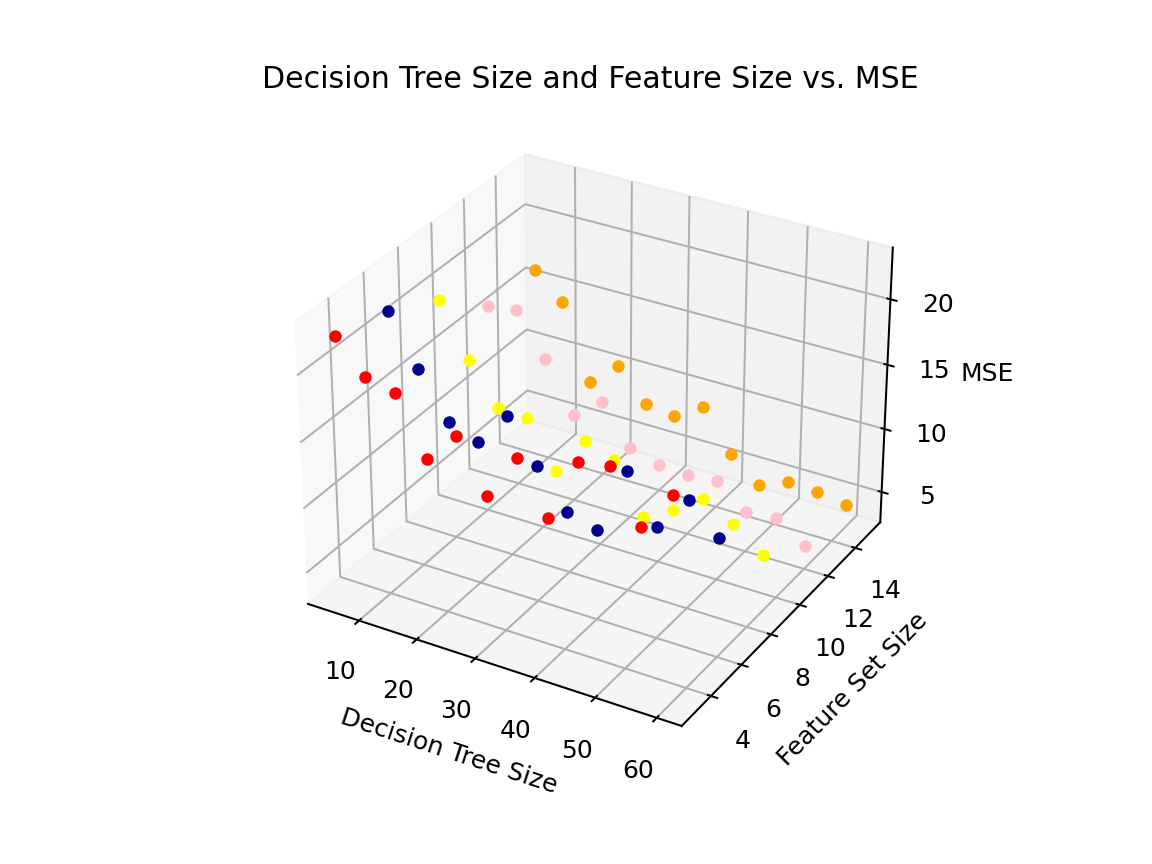

when number of leaf nodes =  5 and number of features = 3 MSE is 22.521151020189443 and accuracy is 0.053368724004919876
when number of leaf nodes =  10 and number of features = 3 MSE is 20.128998628922275 and accuracy is 0.06031819516229164
when number of leaf nodes =  15 and number of features = 3 MSE is 19.578252120564375 and accuracy is 0.14366225584996484
when number of leaf nodes =  20 and number of features = 3 MSE is 15.388668894587125 and accuracy is 0.12580801115256257
when number of leaf nodes =  25 and number of features = 3 MSE is 17.762933303879436 and accuracy is 0.24047174556823592
when number of leaf nodes =  30 and number of features = 3 MSE is 13.92780752975323 and accuracy is 0.07998408347074659
when number of leaf nodes =  35 and number of features = 3 MSE is 17.430845120718416 and accuracy is 0.22192091203482622
when number of leaf nodes =  40 and number of features = 3 MSE is 13.680489768625987 and accuracy is 0.1449802942117402
when number of leaf nodes =  45 an

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Decision Tree Size and Feature Size vs. Accuracy');
ax.set_xlabel('Decision Tree Size')
ax.set_ylabel('Feature Set Size')
ax.set_zlabel('Accuracy');

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.set_title('Decision Tree Size and Feature Size vs. MSE');
ax2.set_xlabel('Decision Tree Size')
ax2.set_ylabel('Feature Set Size')
ax2.set_zlabel('MSE');

for leaf_nodes in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # select features 
    features = ['sex', 'age', 'famrel']
    X,y = data[features], data['G3']
    # Partition the data set
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    #Create Regressor
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_nodes)
    #Train the model using the training sets
    my_tree = my_tree.fit(X,y) 
    #predict the response for test dataset
    prediction = my_tree.predict(X_test)

    # Calculate for the accuracy
    # Estimate accuracy using MSE
    difference_sqaured = 0
    for i in range(len(y_test)):
        difference_sqaured += (prediction[i] - y_test.iloc[i])**2
    MSE = difference_sqaured / len(y_test)
    # Estimate accuracy using accuray score
    accuracy = my_tree.score(X_test, y_test)
    print("when number of leaf nodes = ",leaf_nodes, "and number of features = 3","MSE is", MSE, "and accuracy is", accuracy)  
    
    # Visualize the outcome
    ax.scatter(leaf_nodes, 3, accuracy, c="red", cmap='viridis', linewidth=0.5)
    ax2.scatter(leaf_nodes, 3, MSE, c="red", cmap='viridis', linewidth=0.5)
    
print("")

for leaf_nodes in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # select features 
    features = ['sex', 'age', 'famrel', 'freetime', 'goout', 'Dalc']
    X,y = data[features], data['G3']
    # Partition the data set
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    #Create Regressor
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_nodes)
    #Train the model using the training sets
    my_tree = my_tree.fit(X,y) 
    #predict the response for test dataset
    prediction = my_tree.predict(X_test)

    # Calculate for the accuracy
    # Estimate accuracy using MSE
    difference_sqaured = 0
    for i in range(len(y_test)):
        difference_sqaured += (prediction[i] - y_test.iloc[i])**2
    MSE = difference_sqaured / len(y_test)
    # Estimate accuracy using accuray score
    accuracy = my_tree.score(X_test, y_test)
    print("when number of leaf nodes = ",leaf_nodes, "and number of features = 6","MSE is", MSE, "and accuracy is", accuracy)

    # Visualize the outcome
    ax.scatter(leaf_nodes, 6, accuracy, c="darkblue", cmap='viridis', linewidth=0.5)
    ax2.scatter(leaf_nodes, 6, MSE, c="darkblue", cmap='viridis', linewidth=0.5)

print("")
    
for leaf_nodes in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # select features 
    features = ['sex', 'age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
    X,y = data[features], data['G3']
    # Partition the data set
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    #Create Regressor
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_nodes)
    #Train the model using the training sets
    my_tree = my_tree.fit(X,y) 
    #predict the response for test dataset
    prediction = my_tree.predict(X_test)

    # Calculate for the accuracy
    # Estimate accuracy using MSE
    difference_sqaured = 0
    for i in range(len(y_test)):
        difference_sqaured += (prediction[i] - y_test.iloc[i])**2
    MSE = difference_sqaured / len(y_test)
    # Estimate accuracy using accuray score
    accuracy = my_tree.score(X_test, y_test)
    print("when number of leaf nodes = ",leaf_nodes, "and number of features = 9","MSE is", MSE, "and accuracy is", accuracy)

    # Visualize the outcome
    ax.scatter(leaf_nodes, 9, accuracy, c="yellow", cmap='viridis', linewidth=0.5)
    ax2.scatter(leaf_nodes, 9, MSE, c="yellow", cmap='viridis', linewidth=0.5)

print("")
    
for leaf_nodes in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # select features 
    features = ['sex', 'age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Medu', 'Fedu', 'traveltime']
    X,y = data[features], data['G3']
    # Partition the data set
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    #Create Regressor
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_nodes)
    #Train the model using the training sets
    my_tree = my_tree.fit(X,y) 
    #predict the response for test dataset
    prediction = my_tree.predict(X_test)

    # Calculate for the accuracy
    # Estimate accuracy using MSE
    difference_sqaured = 0
    for i in range(len(y_test)):
        difference_sqaured += (prediction[i] - y_test.iloc[i])**2
    MSE = difference_sqaured / len(y_test)
    # Estimate accuracy using accuray score
    accuracy = my_tree.score(X_test, y_test)
    print("when number of leaf nodes = ",leaf_nodes, "and number of features = 9","MSE is", MSE, "and accuracy is", accuracy)

    # Visualize the outcome
    ax.scatter(leaf_nodes, 12, accuracy, c="pink", cmap='viridis', linewidth=0.5)
    ax2.scatter(leaf_nodes, 12, MSE, c="pink", cmap='viridis', linewidth=0.5)

print("")
    
for leaf_nodes in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # select features 
    features = ['sex', 'age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup']
    X,y = data[features], data['G3']
    # Partition the data set
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    #Create Regressor
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_nodes)
    #Train the model using the training sets
    my_tree = my_tree.fit(X,y) 
    #predict the response for test dataset
    prediction = my_tree.predict(X_test)

    # Calculate for the accuracy
    # Estimate accuracy using MSE
    difference_sqaured = 0
    for i in range(len(y_test)):
        difference_sqaured += (prediction[i] - y_test.iloc[i])**2
    MSE = difference_sqaured / len(y_test)
    # Estimate accuracy using accuray score
    accuracy = my_tree.score(X_test, y_test)
    print("when number of leaf nodes = ",leaf_nodes, "and number of features = 9","MSE is", MSE, "and accuracy is", accuracy)

    # Visualize the outcome
    ax.scatter(leaf_nodes, 15, accuracy, c="orange", cmap='viridis', linewidth=0.5)
    ax2.scatter(leaf_nodes, 15, MSE, c="orange", cmap='viridis', linewidth=0.5)

## Summary

In this model, I used decision tree regression because it is an efficient choice to predict real number values. Since in this data set the predicted values are numerical, I used the mean squared error (MSE) as a metric for accuracy; and a lower MSE means a lower error and therefore a higher accuracy. I also used the accuracy score to help us compare the accuracy of results because the trends of data are more clear on its graph. 

When holding the feature set size constent, the MSE decreases and the accuracy score increases as the decision tree size increases, which indicates that a larger decision tree size leads to a smaller error and a higher accuracy; when holding the decision tree size constent, the MSE decreases and the accuracy score increases as the number of features selected increases, which indicates that a larger feature set size leads to a smaller error and a higher accuracy. I also noticed that there occurs a plateau in the accuracy once I reach a certain amount of nodes or features. In order to discover more about this plateau, I trained the model for several more times and find that in this plateau, the accuracy scores are roughly between 0.7 and 0.8 and the MSE are roughly between 4 and 5. 

# Question 3

I spent about 9 - 10 hours on this homework... but it was FUNNNNN!!!